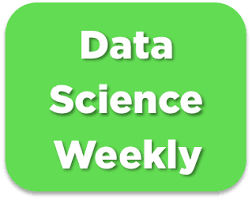

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["iframe"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "iframe"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [2]:
import os 
os.listdir()

['.ipynb_checkpoints',
 'conversion_data_train.csv',
 'Conversion_rate_challenge_template.ipynb',
 'conversion_data_test.csv']

In [2]:
df = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', df.shape)

Set with labels (our train+test) : (284580, 6)


In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explore dataset

In [7]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
df_sample = df.sample(10000)

In [5]:
import seaborn as sns

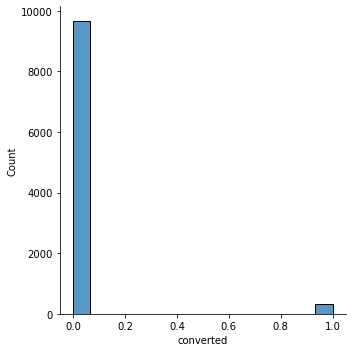

In [11]:
# visualization of converted distrubution 
sns.displot(df_sample.converted)

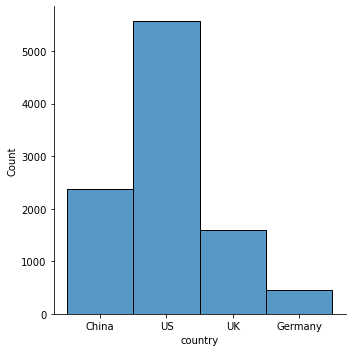

In [15]:
sns.displot(df_sample.country)

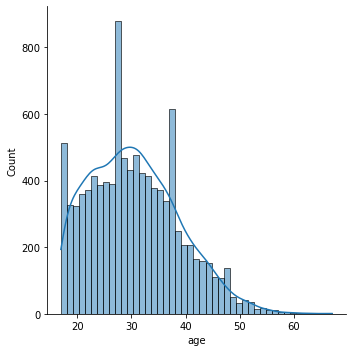

In [17]:
sns.displot(df_sample.age,kde=True)

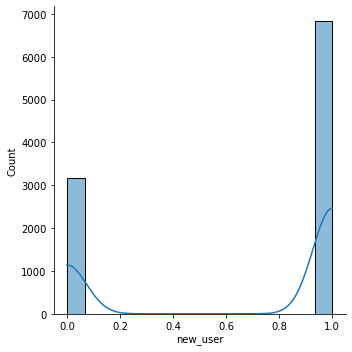

In [9]:
sns.displot(df_sample.new_user,kde=True)

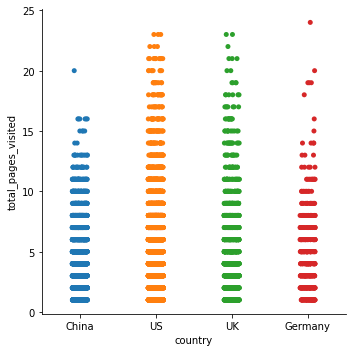

In [17]:
sns.catplot(x='country', y='total_pages_visited',data=df_sample)

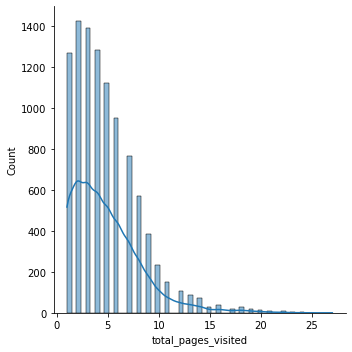

In [19]:
sns.displot(df_sample.total_pages_visited,kde=True)

In [25]:
log_age = np.log(df.age)
log_age_sample = log_age.sample(10000)

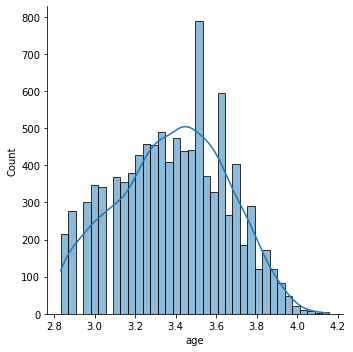

In [26]:
sns.displot(log_age_sample,kde=True)

In [27]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [31]:
df.loc[df.age==123,:]

,country,age,new_user,source,total_pages_visited,converted
233196,Germany,123,0,Seo,15,1


In [16]:
df.source.value_counts()

Seo       139477
Ads        80027
Direct     65076
Name: source, dtype: int64

# Model 1: LogisticRegression with outliers, treat new_user as numeric feature

In [11]:
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
numeric_indices = [1,2,4]
categorical_indices = [0,3]
target_variable = 'converted'

In [12]:
X = df.loc[:,features_list]
Y = df.converted

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [13]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [7]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 23 0 'Direct' 2]
 ['China' 28 0 'Ads' 2]
 ['China' 30 1 'Seo' 7]
 ['UK' 37 1 'Seo' 3]
 ['US' 31 1 'Ads' 8]]
[['China' 24 1 'Ads' 14]
 ['US' 35 0 'Direct' 5]]

[0 0 0 0 0]
[0 0]


* Training pipeline

In [14]:
# Put here all the preprocessings
categorical_transformer = OneHotEncoder()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                             transformers = [('num',numeric_transformer,numeric_indices),
                                             ('cat', categorical_transformer,categorical_indices)])


X_train = preprocessor.fit_transform(X_train)



In [15]:
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)

LogisticRegression()

In [16]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



* Test pipeline

In [17]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.79365434  0.67716581  2.73051047  1.          0.          0.
   0.          1.          0.          0.        ]
 [ 0.53653379 -1.4767432   0.03808136  0.          0.          0.
   1.          0.          1.          0.        ]
 [-0.18902337 -1.4767432  -0.26107743  0.          0.          0.
   1.          0.          1.          0.        ]
 [ 0.05282902  0.67716581  0.93555773  1.          0.          0.
   0.          0.          0.          1.        ]
 [-0.30994956  0.67716581 -0.85939501  0.          0.          0.
   1.          0.          0.          1.        ]]


In [18]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



* Performance assessment

In [19]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7642058764473596
f1-score on test set :  0.7590799031476998


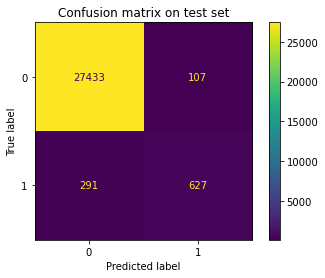

In [20]:
# You can also check more performance metrics to better understand what your model is doing
from sklearn.metrics import ConfusionMatrixDisplay

_ , ax = plt.subplots()
ax.set(title='Confusion matrix on test set')
ConfusionMatrixDisplay.from_predictions(Y_test,Y_test_pred,ax=ax)
plt.show()



* Conclusion : Generally the f1_score is not satisfied and with a little bit overfitting, try other models   

# Model 2: Logistic Regression without outliers of age: 111 and 123 treat new_user as categorial feature

* drop outliers of age

In [80]:
df.age.value_counts()

28     12972
30     12956
29     12710
27     12668
26     12525
31     12327
25     12157
32     12111
24     11647
33     11392
23     11097
34     10911
22     10471
35     10352
21      9870
36      9668
20      9131
37      8773
19      8452
38      8067
18      7662
39      7343
17      6825
40      6451
41      5783
42      5029
43      4423
44      3808
45      3249
46      2693
47      2255
48      1898
49      1467
50      1213
51       990
52       835
53       571
54       459
55       352
56       251
57       211
58       147
59       115
60        86
61        63
62        50
63        29
64        26
65        14
66         9
67         5
68         2
70         2
111        1
72         1
69         1
73         1
79         1
123        1
77         1
Name: age, dtype: int64

In [9]:
mask = (df['age'] != 123) & (df['age'] != 111)
df_model_2 = df.loc[mask,:]

* Modeling

In [10]:
Y = df_model_2.converted
X = df_model_2.iloc[:,:-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1, random_state=0, stratify=Y)

In [11]:
numeric_features = [1,4]
catagorial_featues = [0,2,3]

categorical_transformer = OneHotEncoder()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                             transformers = [('num',numeric_transformer,numeric_features),
                                             ('cat', categorical_transformer,catagorial_featues)])


x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [12]:
classifier_model_2 = LogisticRegression()
classifier_model_2.fit(x_train,y_train)

y_train_pred = classifier_model_2.predict(x_train)
y_test_pred = classifier_model_2.predict(x_test)

print('train set f1_score: ', f1_score(y_train,y_train_pred))
print('test set f1_score: ', f1_score(y_test,y_test_pred))

train set f1_score:  0.7627414163090129
test set f1_score:  0.7711711711711712


# Model 3: random forest with gridsearch without outliers, treat new_user as categorial feature

In [91]:
Y = df_model_2.iloc[:,-1]
X = df_model_2.iloc[:,:-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1, random_state=0, stratify=Y)


numeric_features = [1,4]
catagorial_featues = [0,2,3]

categorical_transformer = OneHotEncoder()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                             transformers = [('num',numeric_transformer,numeric_features),
                                             ('cat', categorical_transformer,catagorial_featues)])


x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [93]:
classifier_model_3 = RandomForestClassifier()
classifier_model_3.fit(x_train,y_train)

y_train_pred = classifier_model_3.predict(x_train)
y_test_pred = classifier_model_3.predict(x_test)

print('train set f1_sore_model_3:', f1_score(y_train,y_train_pred))
print('test set f1_sore_model_3:', f1_score(y_test,y_test_pred))

train set f1_sore_model_3: 0.8012220229793452
test set f1_sore_model_3: 0.7452380952380951


In [94]:
# with hpyerparam

params_model_3 = {'max_depth': np.arange(6,8,1),
                 'min_samples_split': np.arange(9,12,1)}

gridsearch_model_3 = GridSearchCV(classifier_model_3,params_model_3,cv=3)

gridsearch_model_3.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([6, 7]),
                         'min_samples_split': array([ 9, 10, 11])})

In [95]:
print('best_estimors :', gridsearch_model_3.best_estimator_)
print('best_score :', gridsearch_model_3.best_score_)

best_estimors : RandomForestClassifier(max_depth=7, min_samples_split=10)
best_score : 0.9859636127582937


In [96]:
y_train_pred = gridsearch_model_3.predict(x_train)
y_test_pred = gridsearch_model_3.predict(x_test)

print('train set f1_sore:', f1_score(y_train,y_train_pred))
print('test set f1_sore:', f1_score(y_test,y_test_pred))

train set f1_sore: 0.7638197713517147
test set f1_sore: 0.7601700060716454


# Model 4: svc model 

In [ ]:
from sklearn.svm import SVC
mask = (df['age'] != 123) & (df['age'] != 111)
df_model_4 = df.loc[mask,:]

Y = df_model_4.converted
X = df_model_4.iloc[:,:-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1, random_state=0, stratify=Y)


numeric_features = [1,4]
catagorial_featues = [0,2,3]

categorical_transformer = OneHotEncoder()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                             transformers = [('num',numeric_transformer,numeric_features),
                                             ('cat', categorical_transformer,catagorial_featues)])


x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

classifier_model_4 = SVC()

classifier_model_4.fit(x_train,y_train)

y_train_pred = classifier_model_4.predict(x_train)
y_test_pred = classifier_model_4.predict(x_test)

print('train set f1_sore_model_4:', f1_score(y_train,y_train_pred))
print('test set f1_sore_model_4:', f1_score(y_test,y_test_pred))

# Model 5: Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

mask = (df['age'] != 123) & (df['age'] != 111)
df_model_5 = df.loc[mask,:]

Y = df_model_5.converted
X = df_model_5.iloc[:,:-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1, random_state=0, stratify=Y)


numeric_features = [1,4]
catagorial_featues = [0,2,3]

categorical_transformer = OneHotEncoder()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                             transformers = [('num',numeric_transformer,numeric_features),
                                             ('cat', categorical_transformer,catagorial_featues)])


x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)


classifier_model_5 = AdaBoostClassifier()
classifier_model_5.fit(x_train,y_train)

y_train_pred = classifier_model_5.predict(x_train)
y_test_pred = classifier_model_5.predict(x_test)

print('train set f1_score: ', f1_score(y_train,y_train_pred))
print('test set f1_score: ', f1_score(y_test,y_test_pred))

train set f1_score:  0.7535449020931801
test set f1_score:  0.7531992687385741


# Model 6: XGBoost without age=111&123

* use log_age instead of age

In [55]:
mask = (df['age'] != 123) & (df['age'] != 111)
df_model_6 = df.loc[mask,:]

In [56]:
Y = df_model_6.converted
X = df_model_6.iloc[:,:-1]

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y)

In [58]:
numeric_features = [1,4]
catagorial_featues = [0,2,3]

categorical_transformer = OneHotEncoder()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                             transformers = [('num',numeric_transformer,numeric_features),
                                             ('cat', categorical_transformer,catagorial_featues)])


x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [39]:
!pip install xgboost

  Using cached xgboost-1.6.0-py3-none-manylinux2014_x86_64.whl (193.7 MB)


In [39]:
from xgboost import XGBClassifier

In [59]:
model_6 = XGBClassifier()
model_6.fit(x_train,y_train)

y_train_pred = model_6.predict(x_train)
y_test_pred = model_6.predict(x_test)

In [60]:
print('train set f1_score :', f1_score(y_train,y_train_pred))
print('test set f1_score :', f1_score(y_test,y_test_pred))

train set f1_score : 0.7722943722943724
test set f1_score : 0.7581227436823105


# Model 7 : XGBoost replace age=111&123 by the value of other similar rows 

In [8]:
m= (df.age==111) | (df.age==123)
df.loc[m,:]

,country,age,new_user,source,total_pages_visited,converted
11331,UK,111,0,Ads,10,1
233196,Germany,123,0,Seo,15,1


In [16]:
f = (df.country == 'Germany') & (df.source == 'Seo') & (df.total_pages_visited==15) & (df.converted ==1) & (df.new_user==0)
df.loc[f,:].age.value_counts()

26     5
24     4
23     3
31     2
21     2
17     2
28     2
25     2
18     1
22     1
36     1
33     1
19     1
123    1
Name: age, dtype: int64

In [61]:
df_model7 = df.copy()
df_model7.loc[df['age']==111,'age'] =24
df_model7.loc[df['age']==123,'age'] =26

In [62]:
Y = df_model7.converted
X = df_model7.iloc[:,:-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y)

numeric_features = [1,4]
catagorial_featues = [0,2,3]

categorical_transformer = OneHotEncoder()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                             transformers = [('num',numeric_transformer,numeric_features),
                                             ('cat', categorical_transformer,catagorial_featues)])


x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

model_7 = XGBClassifier()
model_7.fit(x_train,y_train)

y_train_pred = model_7.predict(x_train)
y_test_pred = model_7.predict(x_test)

print('train set f1_score :', f1_score(y_train,y_train_pred))
print('test set f1_score :', f1_score(y_test,y_test_pred))

train set f1_score : 0.7723696492865716
test set f1_score : 0.7662105889351576


# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [63]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(x_train,x_test,axis=0)
Y = np.append(y_train,y_test)



In [64]:
model_7.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [67]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.30955887  3.33223183  0.          0.          1.          0.
   1.          0.          0.          0.          1.        ]
 [-1.03587655  0.03795269  0.          0.          1.          0.
   0.          1.          0.          1.          0.        ]
 [ 0.17465291 -1.159967    1.          0.          0.          0.
   0.          1.          0.          0.          1.        ]
 [ 0.17465291  0.33743261  0.          0.          0.          1.
   0.          1.          1.          0.          0.        ]
 [-0.67271771 -0.56100715  1.          0.          0.          0.
   1.          0.          0.          0.          1.        ]]


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [68]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': model_7.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_Mandy2.csv', index=False)


In [46]:
df.converted.value_counts()

0    275400
1      9180
Name: converted, dtype: int64

In [38]:
Y_predictions.value_counts()

converted
0            30794
1              826
dtype: int64

## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**